#Przygotowanie danych

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

print(os.getcwd())

/content


In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


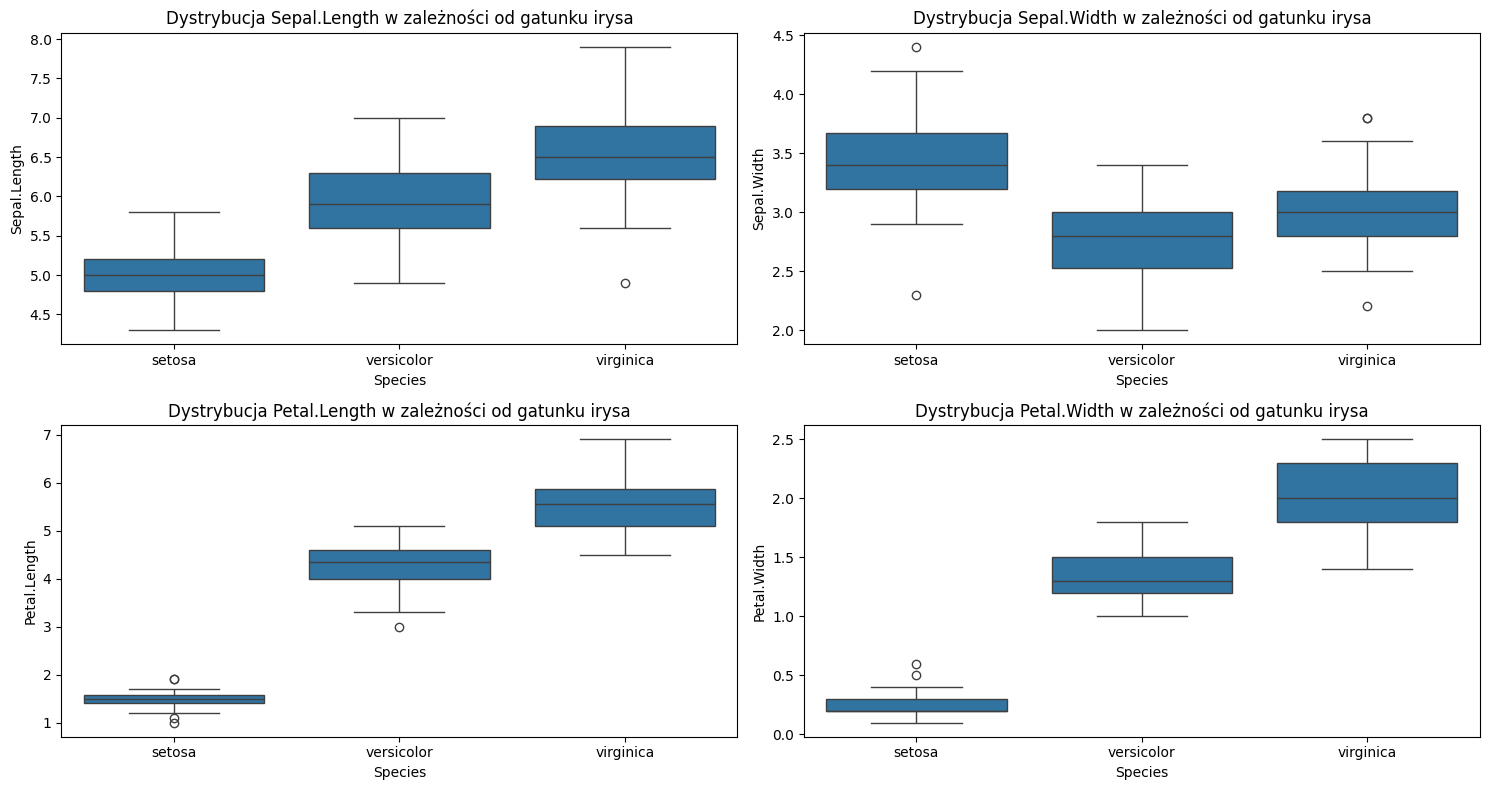

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Dystrybucja {feature} w zależności od gatunku irysa')

plt.tight_layout()
plt.show()

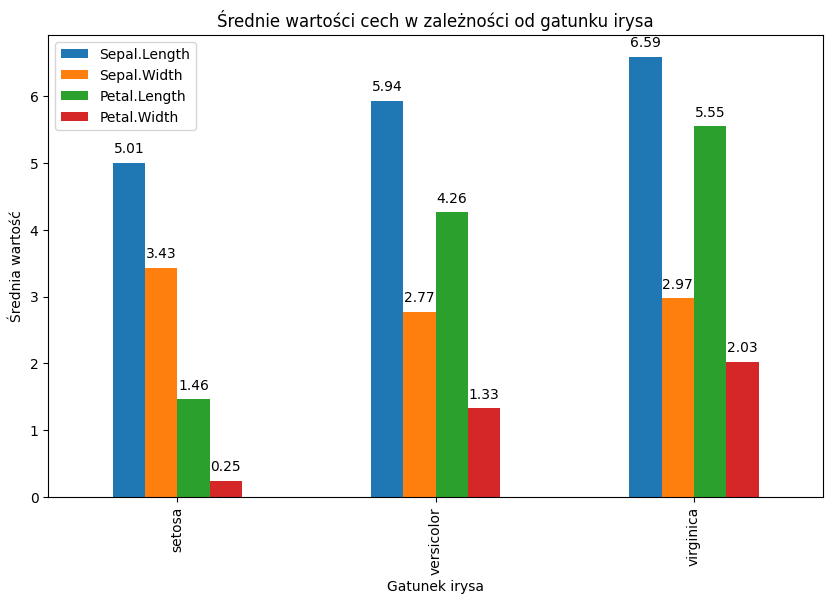

In [ ]:
# grupuj według gatunku i oblicz średnie
mean_values = df.groupby('Species').mean()

# wykres
ax = mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Średnie wartości cech w zależności od gatunku irysa')
plt.ylabel('Średnia wartość')
plt.xlabel('Gatunek irysa')

# etykiety z wartościami
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
df_grouped = df.groupby('Species')
#mediana i moda
medians = df_grouped.median()
modes = df_grouped.apply(lambda x: x.mode().iloc[0])

print("Mediana dla każdej cechy w zależności od gatunku irysa:")
print(medians)

print("\nModa dla każdej cechy w zależności od gatunku irysa:")
print(modes)

Mediana dla każdej cechy w zależności od gatunku irysa:
            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

Moda dla każdej cechy w zależności od gatunku irysa:
0           Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
Species                                                                     
setosa               5.0          3.4           1.4          0.2      setosa
versicolor           5.5          3.0           4.5          1.3  versicolor
virginica            6.3          3.0           5.1          1.8   virginica


In [ ]:
# df['species_is_setosa'] = df['Species'].map(
#     lambda x: 1 if x == "satosa" else 0)
# df['species_is_versicolor'] = df['Species'].map(
#     lambda x: 1 if x == "versicolor" else 0)
# df['species_is_virginica'] = df['Species'].map(
#     lambda x: 1 if x =="virginica" else 0)

In [ ]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Podział na set treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

y=df['Species']
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Macierz korelacji

<ipython-input-13-c4e44e4f9430>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-13-c4e44e4f9430>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


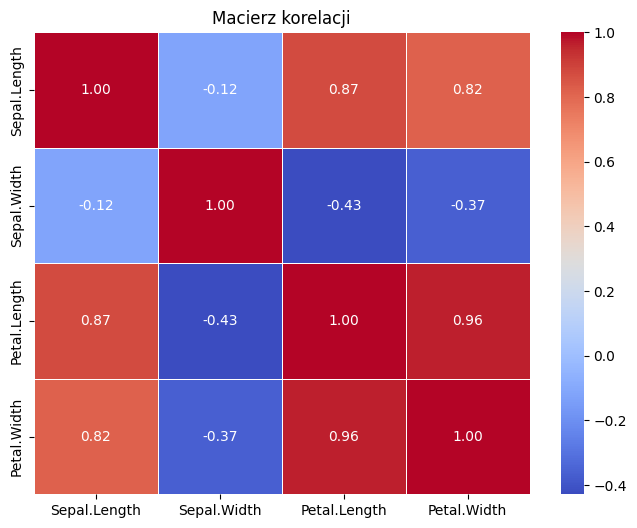

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczanie korelacji
corr_matrix = df.corr()

# Tworzenie wykresu korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji')
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

y_train_pred_knn = KNN.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred_knn) # acc na treningowym

0.95

In [ ]:
y_test_pred_knn = KNN.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_test_pred_knn)

In [ ]:
accuracy_knn

1.0

##Confusion martic dla knn

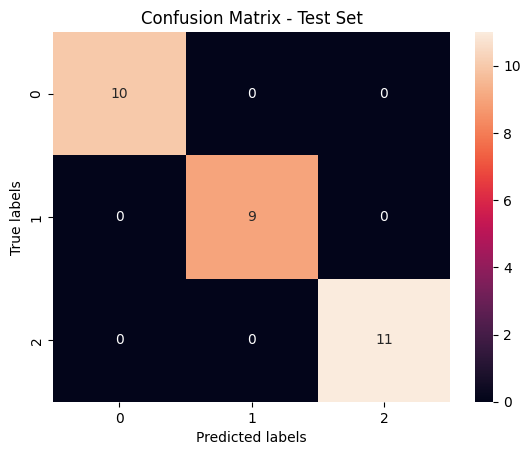

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_knn)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

## Dokładność KNN w zależności od liczby sąsiadów k

Najlepsza wartość k: 3


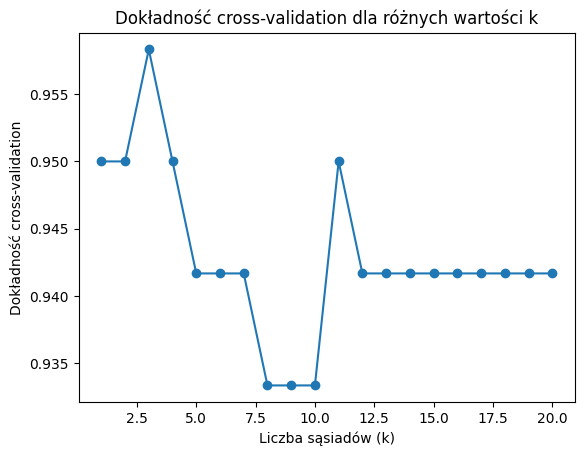

In [ ]:

# liczba sąsiadów do testów
k_values = np.arange(1, 21, 1)

# Cross-validation
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
best_k = k_values[np.argmax(cv_scores)]
print("Najlepsza wartość k:", best_k)
# wizualizacja
plt.plot(k_values, cv_scores, marker='o')
plt.title('Dokładność cross-validation dla różnych wartości k')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność cross-validation')
plt.show()

## Wizualizacja decision boundary dla knn

In [ ]:
df['target'] = df['Species'].map({
    "setosa":0,
    'versicolor':1,
    "virginica":2
})

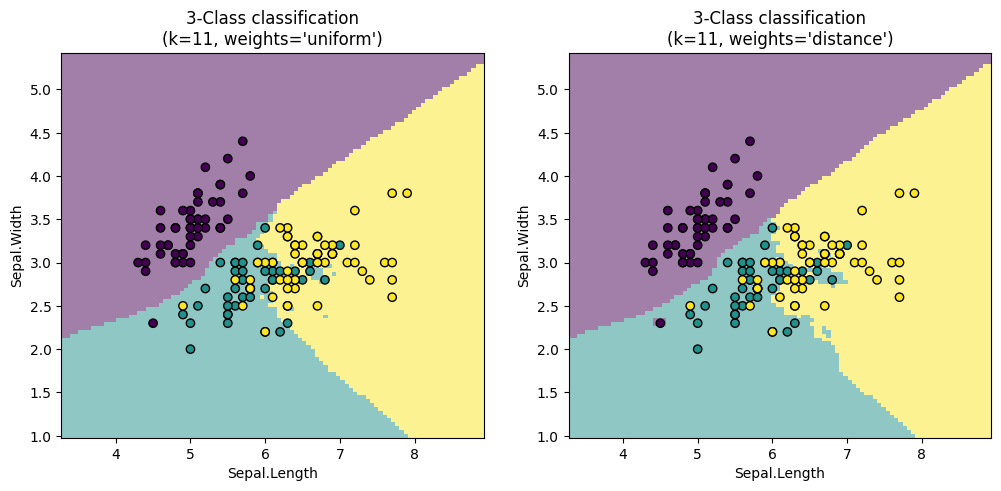

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(df.iloc[:,:2], df.target)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        df.iloc[:,:2],
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.target.to_numpy(), edgecolors="k")
    _ = disp.ax_.set_title(
    f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
)

plt.show()

# SVM

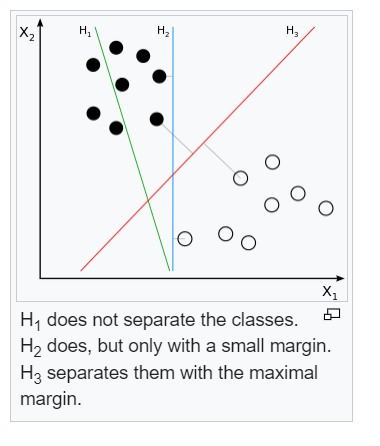

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_test_pred_svm = svc.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_test_pred_svm)

In [ ]:
accuracy_svm

1.0

##Cunfusion matrix dla svm



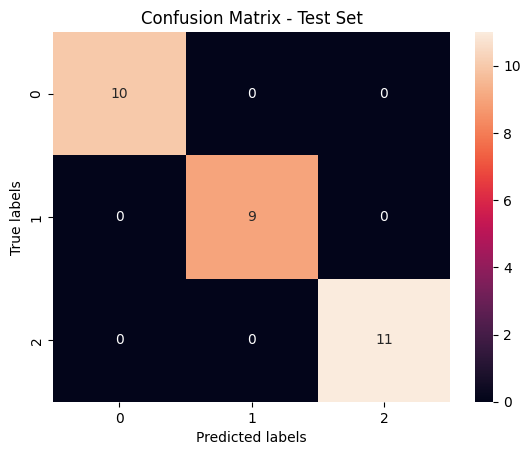

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_svm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

## Wizualizacja decsion boundary dla SVM

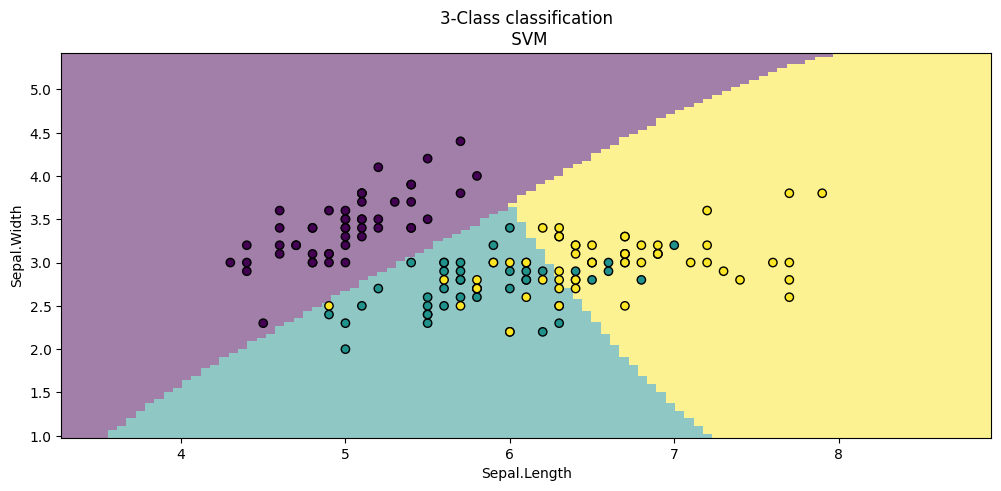

In [ ]:
svc = SVC()
svc.fit(df.iloc[:,:2], df.target)

_, ax = plt.subplots(ncols=1, figsize=(12, 5))


disp = DecisionBoundaryDisplay.from_estimator(
    svc,
    df.iloc[:,:2],
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.target.to_numpy(), edgecolors="k")
_ = disp.ax_.set_title(
f"3-Class classification\n SVM"
)

plt.show()

In [ ]:
#ekspertymen zostawiamy tylko support_vectory i zobaczymy jak zmieni się acc modelu,
#czy pozostałe dane mają jakiś wpływ?
len(svc.support_vectors_)

94

In [ ]:
# Sprawdź rozmiar zbioru treningowego z wektorami nośnymi
print(svc.support_vectors_.shape)

# Sprawdź rozmiar zbioru testowego
print(X_test.shape)

(94, 2)
(30, 4)


In [ ]:
print(svc.support_) #indeksy w orginalnym zestawie danych które są brane pod uwagę

[  1   9  12  14  18  20  25  28  31  34  35  36  41  45  50  51  52  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  70  71  72  73
  74  75  76  77  78  79  82  83  84  85  86  87  88  91  92  93  95  96
  97  98  99 100 101 103 104 106 108 110 111 112 113 114 115 116 119 121
 123 124 126 127 128 131 132 133 134 136 137 138 140 141 142 143 144 145
 146 147 148 149]


In [ ]:
support_indices = svc.support_
X_train_support = df.iloc[support_indices, :2]
y_train_support = df.iloc[support_indices, -1]
svc.fit(X_train_support, y_train_support)


SVC()

In [ ]:
X_train_support

,Sepal.Length,Sepal.Width
1,4.9,3.0
9,4.9,3.1
12,4.8,3.0
14,5.8,4.0
18,5.7,3.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
y_train_support

1      0
9      0
12     0
14     0
18     0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 94, dtype: int64

In [ ]:
support_indices

array([  1,   9,  12,  14,  18,  20,  25,  28,  31,  34,  35,  36,  41,
        45,  50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  82,  83,  84,  85,  86,  87,  88,  91,  92,  93,
        95,  96,  97,  98,  99, 100, 101, 103, 104, 106, 108, 110, 111,
       112, 113, 114, 115, 116, 119, 121, 123, 124, 126, 127, 128, 131,
       132, 133, 134, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149], dtype=int32)

In [ ]:
y_train.index.intersection(y_train_support.index).shape

(70,)

In [ ]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30],
           dtype='int64')

In [ ]:
X_test_support =df.loc[y_test.index].iloc[:,:2]
y_test_support=df.loc[y_test.index].iloc[:,-1]

In [ ]:
y_train.index.intersection(y_test_support.index) #no overlap

Int64Index([], dtype='int64')

In [ ]:
svc.fit(X_train_support, y_train_support)

y_test_pred_new = svc.predict(X_test_support)

accuracy_score(y_test_support, y_test_pred_new)


0.9

In [ ]:
len(X_test_support)

30

In [ ]:
# support_indices = svc.support_
# X_train_support = df.iloc[support_indices, :2]
# y_train_support = df.iloc[support_indices, -1]
# y_train_pred_new = svc.predict(X_train_support)
# accuracy_score(y_train_support, y_train_pred_new)

In [ ]:
X_test_support =df.loc[y_test.index].iloc[:,:2]
y_test_support=df.loc[y_test.index].iloc[:,-1]
y_test_pred_new = svc.predict(X_test_support)

accuracy_score(y_test_support, y_test_pred_new)


0.9

In [ ]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


##RadViz Visualisation

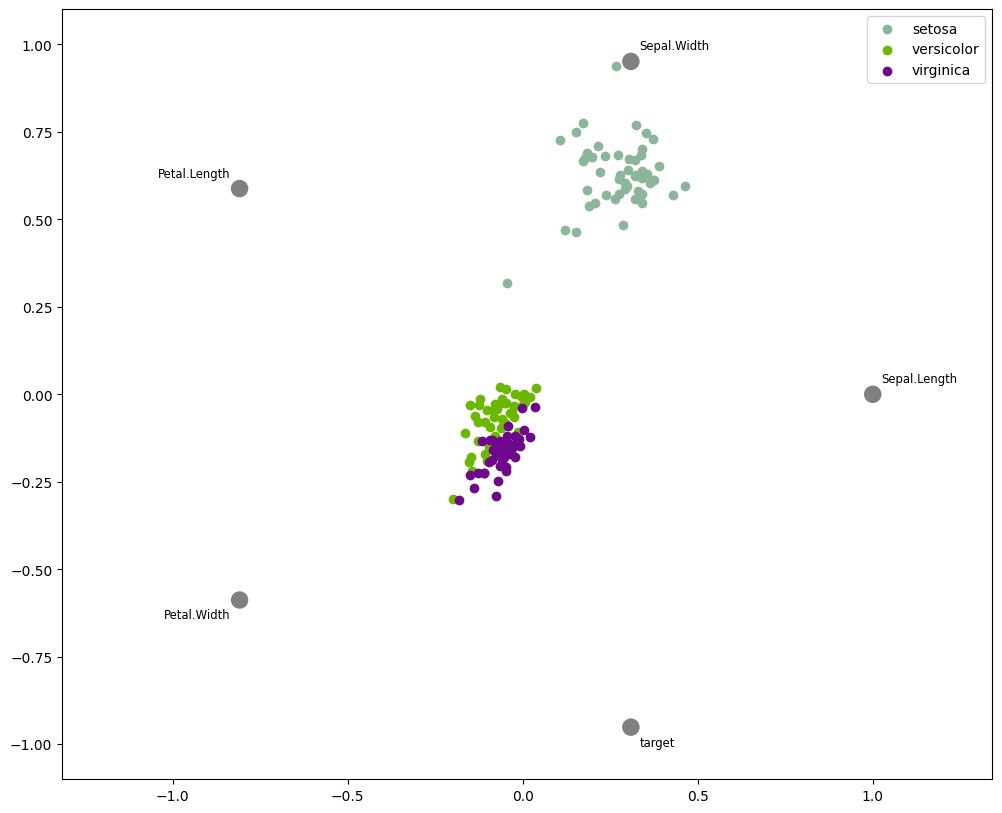

In [ ]:
from pandas.plotting import radviz

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 10))
radviz(df, 'Species')
plt.show()

# DRZEWO DECYZYJNE

##Wizualizacja drzewa decyzyjnego

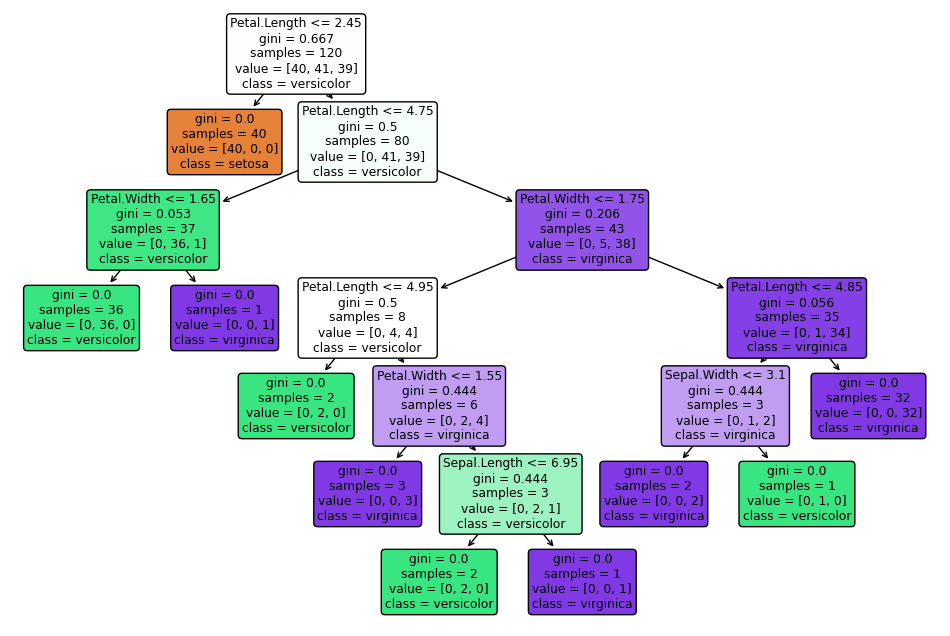

Reguły decyzyjne:
|--- Petal.Length <= 2.45
|   |--- class: setosa
|--- Petal.Length >  2.45
|   |--- Petal.Length <= 4.75
|   |   |--- Petal.Width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- Petal.Width >  1.65
|   |   |   |--- class: virginica
|   |--- Petal.Length >  4.75
|   |   |--- Petal.Width <= 1.75
|   |   |   |--- Petal.Length <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- Petal.Length >  4.95
|   |   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- Petal.Width >  1.55
|   |   |   |   |   |--- Sepal.Length <= 6.95
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- Sepal.Length >  6.95
|   |   |   |   |   |   |--- class: virginica
|   |   |--- Petal.Width >  1.75
|   |   |   |--- Petal.Length <= 4.85
|   |   |   |   |--- Sepal.Width <= 3.10
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- Sepal.Width >  3.10
|   |   |   |   |   |--- class: versicolor
|   |   |   |--- 

In [ ]:
# Importowanie niezbędnych bibliotek
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# Iinicjalizacja i trening
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# drzewo decyzyjne
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=df['Species'].unique(), filled=True, rounded=True)
plt.show()

# reguły decyzyjne
r = export_text(clf, feature_names=X.columns.tolist())
print("Reguły decyzyjne:")
print(r)

In [ ]:
y_test_pred_dt = clf.predict(X_test)
accuracy_dt =accuracy_score(y_test,y_test_pred_dt)

In [ ]:
accuracy_dt

1.0

In [ ]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train,y_train_pred)

1.0

##Confusion matrix dla drzewa decyzyjnego



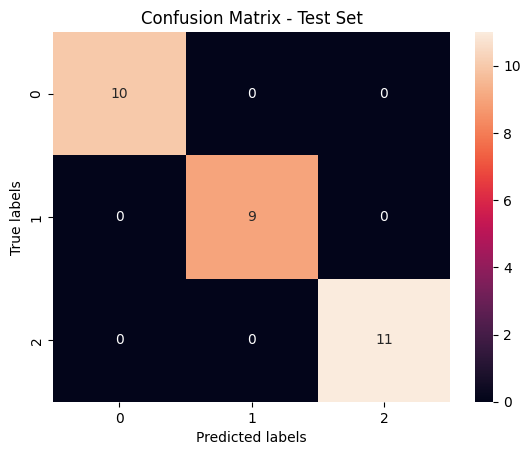

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_dt)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

#Podsumowanie

In [ ]:
print(f'Dokładność KNN: {accuracy_knn:.2f}')
print(f'Dokładność SVM: {accuracy_svm:.2f}')
print(f'Dokładność Decision Tree: {accuracy_dt:.2f}')

# Porównanie raportów klasyfikacji
print('\nRaport klasyfikacji dla KNN:')
print(classification_report(y_test, y_test_pred_knn))

print('\nRaport klasyfikacji dla SVC:')
print(classification_report(y_test, y_test_pred_svm))

print('\nRaport klasyfikacji dla Decision Tree:')
print(classification_report(y_test, y_test_pred_dt))

Dokładność KNN: 1.00
Dokładność SVM: 1.00
Dokładność Decision Tree: 1.00

Raport klasyfikacji dla KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Raport klasyfikacji dla SVC:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Raport klasyfikacji dla Decision Tree:
              precision    recall  f1-score   support

      seto